# Loading Libraries and Data
First, let us load the necessary libraries into the Jupyter Notebook, and load in the data we need from the players.csv and sessions.csv files.

In [3]:
library(tidyverse)
players_info <- read_csv("players.csv")
sessions_info <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 1) Data Description

In [7]:
summary(players_info)
players_info |>
count(experience)
players_info |>
count(gender)
# players_info |>
# filter(played_hours == 0)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


Looking at the summary of the players.csv file, there are 196 observations and 7 variables, showing data for each player. Below is information for each of the variables.
- experience: character type, describing the experience level of each player, which can be either 'Beginner' (35 players), 'Regular' (36 players), 'Amateur' (63 players), 'Veteran' (48 players) or 'Pro' (14 players).
- subscribe: logical type, describing if the player is subscribed (True, 144 players) or not (False, 52 players).
- hashedEmail: character type, the email of the player, which is masked to protect their identity.
- played_hours: double type, the amount of hours played by a given player, ranging from 0 to 223.10 hours, with a mean of 5.8 hours.
- name: character type, the name of each player.
- gender: character type, the gender of each player, either 'Male' (124 players), 'Female' (37 players), 'Non-binary' (15 players), 'Prefer not to say' (11 players), 'Two-Spirited' (6 players), 'Agender' (2 players) or 'Other (1 player).
- age: double type, the age of the player, ranging from 9 to 58 years old, with a median age of 19 years old.

The biggest issue I saw is that there are 85 players who have played 0 hours, which may affect future data analyses.

In [5]:
summary(sessions_info)
head(sessions_info)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Looking at the summary of the players.csv file, there are 1535 observations and 5 variables, showing data about individual play sessions from each player. Below is information for each of the variables.
- hashedEmail: character type, the email of the player, which is masked to protect their identity.
- start_time: character type, the start time of each session
- end_time: character type, the end time of each session
- original_start_time: double type, the original start time of each session
- original_end_time: double type, the original end time of each session

The biggest issue I saw in this file was that both the original_start_time and original_end_time columns have numbers that are significantly large, and may be difficult to visualize.

# 2) Questions

Can the age of a player predict the level of experience they have?

The data will help me address this as I am given a wide range of ages and five possible classifications for level of experince. To wrangle the data, I will create a new dataframe that only contain the 'Age' and 'experience' columns.

# 3) Exploratory Data Analysis and Visualization

### I) Loading Datasets into R

In [8]:
players_info <- read_csv("players.csv")
sessions_info <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### II) Tidying the Data

In [44]:
tidy_players_info <- head(players_info)
tidy_players_info

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [45]:
# tidy_sessions_info <- head(sessions_info) |>
#     mutate(original_start_time = as_datetime(original_start_time/1000)) |>
#     mutate(original_end_time = as_datetime(original_end_time/1000))
# tidy_sessions_info

### III) Mean Values of players.csv Datastet

In [61]:
mean_of_quantitative_variables <- tidy_players_info |>
    select(played_hours, Age) |>
    map_df(mean)
mean_of_quantitative_variables

played_hours,Age
<dbl>,<dbl>
5.816667,17


### IV) Visualizations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


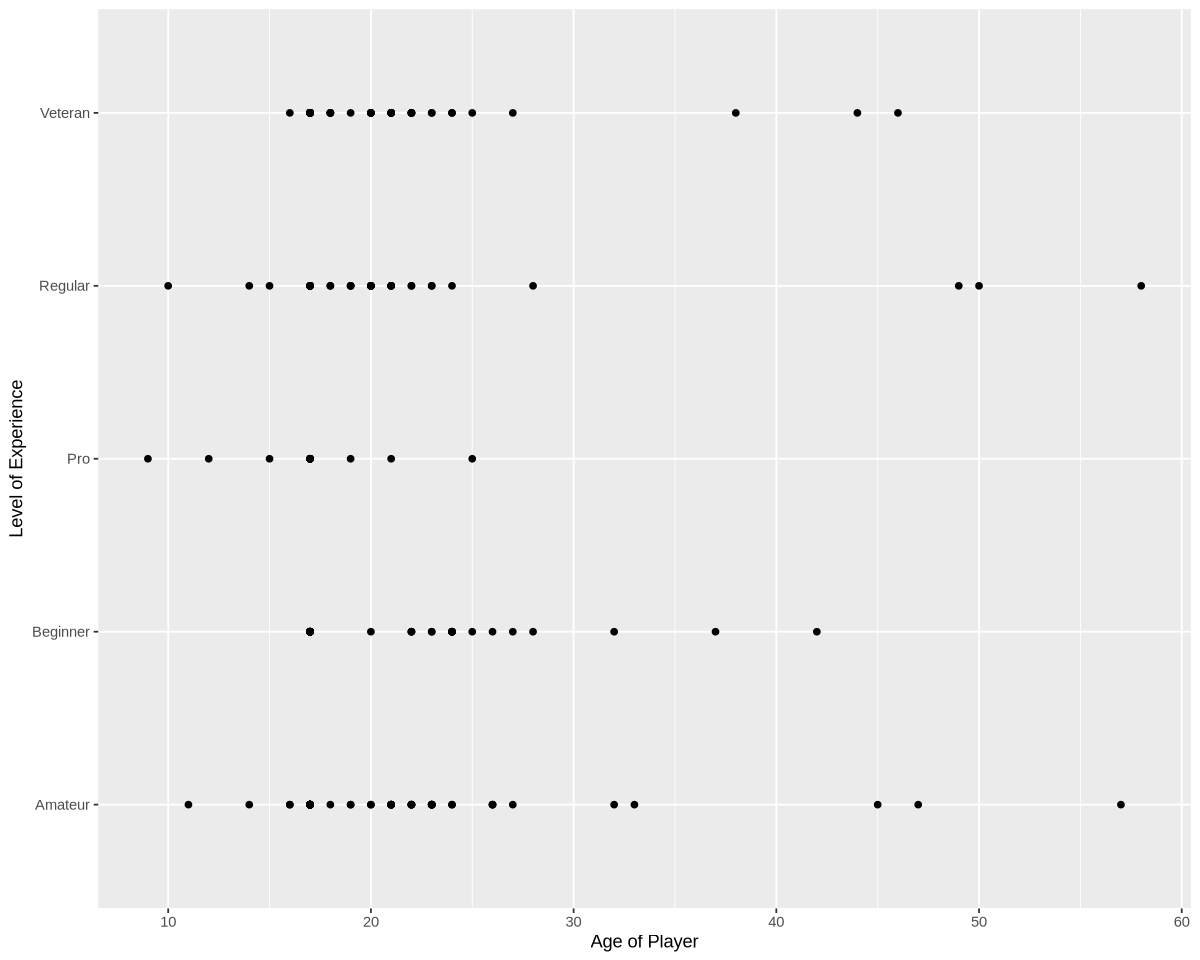

In [42]:
options(repr.plot.width = 10, repr.plot.height = 8)
# Plotting age vs level of experience
age_vs_experience_plot <- tidy_players_info |>
    ggplot(aes(x = 	Age, y = experience)) +
           geom_point() +
           labs(x = 'Age of Player', y = 'Level of Experience')
age_vs_experience_plot

# 4) Methods and Plan

The method I will use to address my question of interest is K-Nearest Neighbours. This method is appropiate as I am trying to 

# 5) GitHub Repository Link

https://github.com/saurav-s25/DSCI-100-Project-Individual.git